### In this section, we are trying to find the reasonable feature for predicting the total ridership in the dataset. We will first clean and preprocess the data to see whether we have a reasonable dataset to explore and then we will draw some graphs that may imply some potential relationship between the target we want to predict and to see which features are suitable to be selected as feature.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
d = pd.read_csv('Monthly_Transportation_Statistics.csv')
d.shape

(911, 136)

In [6]:
d.head(2)

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### at this point we could see that there are way too much na in the dataset for us to make reasonable prediction. In order to see which variables could provide some sense, we first write a function that could generate a table that shows the percentage of NA for each variables.

In [7]:
def table(data):
    a = []
    for col in data.columns:
        a.append(np.sum(data[col].isna())/len(data[col]))
    df = pd.DataFrame({'variables': data.columns, 'na%': a})
    return df

table(d)

,variables,na%
0,Index,0.000000
1,Date,0.000000
2,Air Safety - General Aviation Fatalities,0.455543
3,Highway Fatalities Per 100 Million Vehicle Mil...,0.936334
4,Highway Fatalities,0.939627
...,...,...
131,U.S. Airline Traffic - Domestic - Non Seasonal...,0.926454
132,Transborder - Total North American Freight,0.780461
133,Transborder - U.S. - Mexico Freight,0.780461
134,U.S. marketing air carriers on-time performanc...,0.938529


### At this point we found out that there are way too much variable that has majority of its data being NA, and many of them even have over 90% of the data being NA. In order to train a model and match the integrity the other variables, we cannot use data that has different proportion of NA. We noticed that the data have been divided into months unit, which could be one of reason that some of data generate many NA. So that we group our data into year and take the average of the data to see whether the NA will be lower or not.

In [8]:
pattern = r"\d+\/\d+\/"
newdate = d['Date'].str.replace(pattern, "")
pattern2 = r"\d+\:.*"
newdate = newdate.str.replace(pattern2, "")
d['Year'] = newdate

/tmp/ipykernel_1564/193120744.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  newdate = d['Date'].str.replace(pattern, "")
/tmp/ipykernel_1564/193120744.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  newdate = newdate.str.replace(pattern2, "")


In [9]:
new = d.groupby('Year').mean()

In [10]:
table(new)

,variables,na%
0,Index,0.000000
1,Air Safety - General Aviation Fatalities,0.381579
2,Highway Fatalities Per 100 Million Vehicle Mil...,0.802632
3,Highway Fatalities,0.815789
4,U.S. Airline Traffic - Total - Seasonally Adju...,0.921053
...,...,...
130,U.S. Airline Traffic - Domestic - Non Seasonal...,0.921053
131,Transborder - Total North American Freight,0.776316
132,Transborder - U.S. - Mexico Freight,0.776316
133,U.S. marketing air carriers on-time performanc...,0.934211


### However, we found that after grouping the data into years, some of the variable disapper, which means that we couldn't use this approach to select the features. so we just set an arbitrary threshold of 50%. If the NA percentage is lower than 50% than we will consider taking it as our variables.

In [11]:
nn = table(d)
nn

,variables,na%
0,Index,0.000000
1,Date,0.000000
2,Air Safety - General Aviation Fatalities,0.455543
3,Highway Fatalities Per 100 Million Vehicle Mil...,0.936334
4,Highway Fatalities,0.939627
...,...,...
132,Transborder - Total North American Freight,0.780461
133,Transborder - U.S. - Mexico Freight,0.780461
134,U.S. marketing air carriers on-time performanc...,0.938529
135,Transborder - U.S. - Canada Freight,0.780461


### Our original research question was to focus on ridership prediction, however, due to large scale of NA in the ridership mode, we think that using rail ridership data is a reasonable move since it has the least NA. To make feature selection, we would like to know the relationship between passenger rail total mile and other variables. First we want to see if there is a correlation between air Safety and rail road miles traveled.

Text(0.5, 1.0, 'Air Safety vs Passenger Rail Total Train Miles')

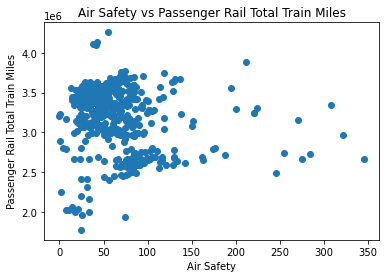

In [12]:
plt.scatter(d['Air Safety - General Aviation Fatalities'], d['Passenger Rail Total Train Miles'])
plt.xlabel('Air Safety')
plt.ylabel('Passenger Rail Total Train Miles')
plt.title('Air Safety vs Passenger Rail Total Train Miles')

### we could see that there is a positive correlation between the two. This could indicate that air safety may contribute to be one of our feature since air safety may indicate the development of transportation. As air safety increases, this indicates that the society has a higher inclination toward travel. However, there are few points that shows downward trending at the end, implying non-linear relationship between the two. You could also argue that the data point at the upper right of the graph is outlier since it deviates far away from the main cluster.

### also I would like to know that how does the raile ridership changes along with the time and maybe discover some effect of covid on the ridership.

(array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

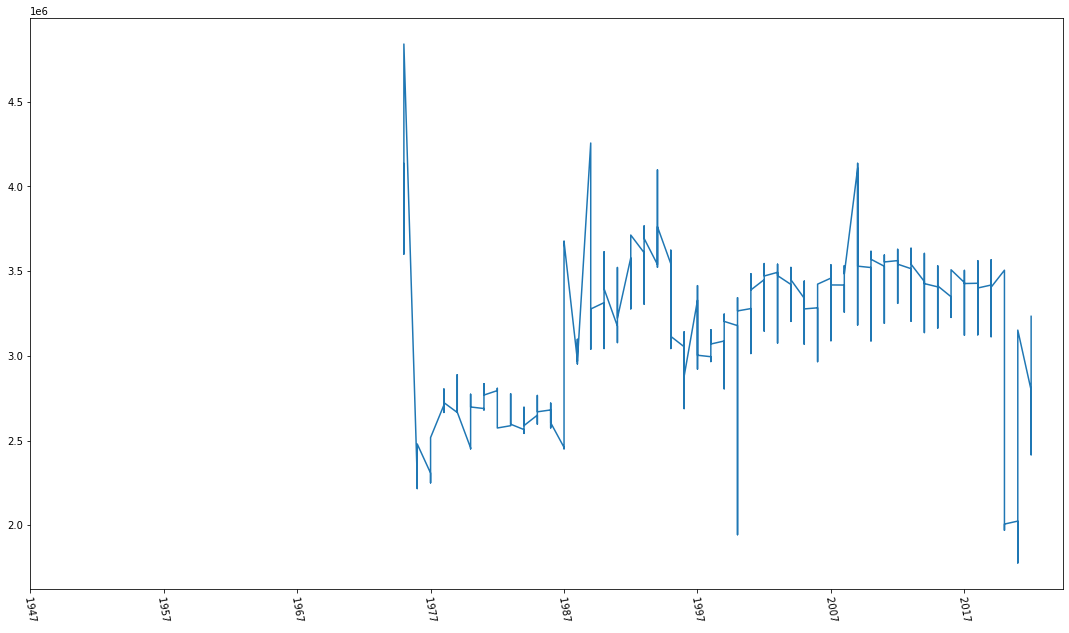

In [13]:
plt.plot(d['Year'], d['Passenger Rail Total Train Miles'])
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation=280)

### we could see that during the covid year the ridership of rail decreased dramatically, and historically it seems like the ridership of rail varies with historical events that has no obvious pattern. Therefore, even though we could see a clear impact of covid, but time should not be considered as a feature for predicting ridership of rail.

### Non-Parametric Methods （Decision Tree + Random Forest)

In [14]:
X_names = list(nn[nn['na%']<0.6]['variables'])
X_names

['Index',
 'Date',
 'Air Safety - General Aviation Fatalities',
 'Freight Rail Intermodal Units',
 'Freight Rail Carloads',
 'Highway Fuel Price - Regular Gasoline',
 'Passenger Rail Passengers',
 'Passenger Rail Passenger Miles',
 'Passenger Rail Total Train Miles',
 'Passenger Rail Employee Hours Worked',
 'Passenger Rail Yard Switching Miles',
 'Passenger Rail Total Reports',
 'Rail Fatalities',
 'Rail Fatalities at Highway-Rail Crossings',
 'Trespasser Fatalities Not at Highwaya-Rail Crossings',
 'Heavy truck sales',
 'Light truck sales',
 'Auto sales',
 'Heavy truck sales SAAR (millions)',
 'Light truck sales SAAR (millions)',
 'Auto sales SAAR (millions)',
 'Year']

In [15]:
'Passenger Rail Total Train Miles',

('Passenger Rail Total Train Miles',)

In [16]:
x  = [
 'Air Safety - General Aviation Fatalities',
 'Freight Rail Intermodal Units',
 'Freight Rail Carloads',
 'Highway Fuel Price - Regular Gasoline',
 'Passenger Rail Passengers',
 'Passenger Rail Passenger Miles',
 'Passenger Rail Employee Hours Worked',
 'Passenger Rail Yard Switching Miles',
 'Passenger Rail Total Reports',
 'Rail Fatalities',
 'Rail Fatalities at Highway-Rail Crossings',
 'Trespasser Fatalities Not at Highwaya-Rail Crossings',
 'Heavy truck sales',
 'Light truck sales',
 'Auto sales',
 'Heavy truck sales SAAR (millions)',
 'Light truck sales SAAR (millions)',
 'Auto sales SAAR (millions)',
 'Year']

In [17]:
use_data = d[(d['Year'].astype('int')<2020) & (d['Year'].astype('int')>1975)]
model_X = use_data.loc[:, x]
y = use_data['Passenger Rail Total Train Miles']

In [18]:
for col in model_X.columns:
    col_data = model_X[col]
    if any(isinstance(x, str) for x in col_data):
        int_col_data = [int(my_str.replace(',', '')) for my_str in col_data ]
        use_data[col]=int_col_data

/tmp/ipykernel_1564/3970459146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data[col]=int_col_data


In [19]:
model_X = model_X.fillna(model_X.median())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_X, y, test_size=0.33, random_state=1)

In [20]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
print('R^2 score of decision tree model:', model.score(X_test, y_test))

R^2 score of decision tree model: 0.7546870638754437


In [21]:
pred = model.predict(X_test)
mean_squared_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

197876.4158810241

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8410695762504519

In [23]:
model_X.shape

(528, 19)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
rf1 = RandomForestRegressor()

grid_values = {'max_features': np.arange(1,20)}
cv_rf = GridSearchCV(rf1, param_grid = grid_values, scoring = 'r2', cv=10, verbose = 1)
cv_rf.fit(X_train, y_train)

acc = cv_rf.cv_results_['mean_test_score']
max_features = cv_rf.cv_results_['param_max_features'].data

table = pd.DataFrame({'max_features' : max_features, 'Validation R2': acc}).sort_values('Validation R2', ascending = False)

best_max_feature = table.reset_index()['max_features'][0]

best_cv_rf = RandomForestRegressor(max_features = best_max_feature)
best_cv_rf.fit(X_train, y_train)

model_2e_acc = best_cv_rf.score(X_test, y_test)
print('best max feature number is:', best_max_feature)
print(f'CV Random Forest Test R^2: {model_2e_acc:.4f}')

Fitting 10 folds for each of 19 candidates, totalling 190 fits
best max feature number is: 6
CV Random Forest Test R^2: 0.8524


### GLM （Bayesian + Frequentist）

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pymc3 as pm
from pymc3 import glm
import statsmodels.api as sm
import arviz

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [27]:
np.mean(y)

3166436.5606060605

In [28]:
np.var(y)

158517968964.26904

(array([1.63852455e-08, 0.00000000e+00, 2.45778682e-07, 3.27704910e-08,
        3.11319664e-07, 3.76860646e-07, 9.50344238e-07, 4.75172119e-07,
        2.62163928e-07, 5.40713101e-07, 6.22639329e-07, 7.04565556e-07,
        1.57298357e-06, 1.52382783e-06, 7.53721292e-07, 1.80237700e-07,
        1.63852455e-08, 0.00000000e+00, 4.91557365e-08, 1.63852455e-08]),
 array([1944302. , 2059890.1, 2175478.2, 2291066.3, 2406654.4, 2522242.5,
        2637830.6, 2753418.7, 2869006.8, 2984594.9, 3100183. , 3215771.1,
        3331359.2, 3446947.3, 3562535.4, 3678123.5, 3793711.6, 3909299.7,
        4024887.8, 4140475.9, 4256064. ]),
 <BarContainer object of 20 artists>)

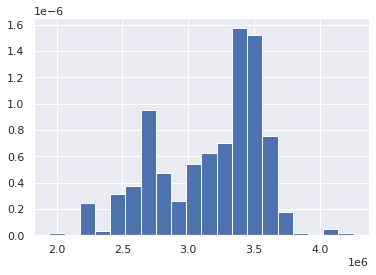

In [29]:
plt.hist(y, density = True, bins = 20)

In [30]:
use_data.shape

(528, 137)

In [31]:
x  = [
 'Air Safety - General Aviation Fatalities',
 'Freight Rail Intermodal Units',
 'Freight Rail Carloads',
 'Highway Fuel Price - Regular Gasoline',
 'Passenger Rail Passengers',
 'Passenger Rail Passenger Miles',
 'Passenger Rail Employee Hours Worked',
 'Passenger Rail Yard Switching Miles',
 'Passenger Rail Total Reports',
 'Rail Fatalities',
 'Rail Fatalities at Highway-Rail Crossings',
 'Trespasser Fatalities Not at Highwaya-Rail Crossings',
 'Heavy truck sales',
 'Light truck sales',
 'Auto sales',
 'Heavy truck sales SAAR (millions)',
 'Light truck sales SAAR (millions)',
 'Auto sales SAAR (millions)',
 'Year']

In [32]:
use_data.rename(columns = {'Passenger Rail Total Train Miles':'Passenger_Rail_Total_Train_Miles', 
                       "Passenger Rail Employee Hours Worked":"Passenger_Rail_Employee_Hours_Worked",
                      "Passenger Rail Yard Switching Miles":"Passenger_Rail_Yard_Switching_Miles",
                      "Passenger Rail Passengers":"Passenger_Rail_Passengers",
                      "Passenger Rail Total Reports":"Passenger_Rail_Total_Reports"}, inplace = True)

/home/jovyan/envs/mystat159/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
sum(y == np.nan)

0

In [35]:
#with pm.Model() as negbin_model:
#    glm.GLM.from_formula('Passenger_Rail_Total_Train_Miles ~ Passenger_Rail_Employee_Hours_Worked', use_data, family=glm.families.NegativeBinomial())
#    negbin_trace = pm.sample(1000, cores=2, target_accept=0.95, return_inferencedata=True)

In [36]:
data = d

pattern = r"\d+\/\d+\/"
newdate = data['Date'].str.replace(pattern, "")
pattern2 = r"\d+\:.*"
newdate = newdate.str.replace(pattern2, "")
data['Year'] = newdate

data= data[(data['Year'].astype("int") > 1975) & (data['Year'].astype("int") < 2020)]

data.rename(columns = {'Passenger Rail Total Train Miles':'Passenger_Rail_Total_Train_Miles', 
                       "Passenger Rail Employee Hours Worked":"Passenger_Rail_Employee_Hours_Worked",
                      "Passenger Rail Yard Switching Miles":"Passenger_Rail_Yard_Switching_Miles",
                      "Passenger Rail Passengers":"Passenger_Rail_Passengers",
                      "Passenger Rail Total Reports":"Passenger_Rail_Total_Reports",
                      "Passenger Rail Employee Hours Worked":"Passenger_Rail_Employee_Hours_Worked"}, inplace = True)

rail = data[['Year','Passenger_Rail_Total_Train_Miles',"Passenger_Rail_Employee_Hours_Worked","Passenger_Rail_Yard_Switching_Miles","Passenger_Rail_Passengers","Passenger_Rail_Total_Reports"]]

rail = rail.replace(0,np.NaN)
rail['Passenger_Rail_Yard_Switching_Miles'] = rail.Passenger_Rail_Yard_Switching_Miles.interpolate(limit_direction='both')
rail

def take_log(col):
    rail["log_"+col] = np.log(rail[col])
    
for col in rail.columns[1:]:
    take_log(col)


log_hour = np.log(data['Passenger_Rail_Employee_Hours_Worked']) 
rail['log_hour'] = log_hour
    

/tmp/ipykernel_1564/57089814.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  newdate = data['Date'].str.replace(pattern, "")
/tmp/ipykernel_1564/57089814.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  newdate = newdate.str.replace(pattern2, "")
/home/jovyan/envs/mystat159/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
with pm.Model() as gaussian_model:
    glm.GLM.from_formula("log_Passenger_Rail_Total_Train_Miles ~ log_Passenger_Rail_Yard_Switching_Miles + log_Passenger_Rail_Employee_Hours_Worked+log_Passenger_Rail_Passengers+log_Passenger_Rail_Total_Reports", rail)
    gaussian_trace = pm.sample(100, cores=1, target_accept=0.95, return_inferencedata=True)

In [ ]:
arviz.plot_trace(gaussian_trace, figsize = (12,25))

In [ ]:
arviz.plot_trace(gaussian_trace, var_names = ["log_Passenger_Rail_Yard_Switching_Miles","log_Passenger_Rail_Employee_Hours_Worked","log_Passenger_Rail_Passengers","log_Passenger_Rail_Total_Reports"],figsize = (12,15))

In [ ]:
plt.scatter(rail['log_hour'],rail['log_Passenger_Rail_Total_Train_Miles'])

In [ ]:
with pm.Model() as negbin_model:
    glm.GLM.from_formula("log_Passenger_Rail_Total_Train_Miles ~ log_hour", rail, family=glm.families.NegativeBinomial())
    gaussian_trace = pm.sample(100, cores=1, target_accept=0.95, return_inferencedata=True)

In [ ]:
arviz.plot_trace(gaussian_trace, figsize = (12,15))

In [38]:
data.rename(columns = {'Passenger Rail Total Train Miles':'Passenger_Rail_Total_Train_Miles', 
                       "Passenger Rail Employee Hours Worked":"Passenger_Rail_Employee_Hours_Worked",
                      "Passenger Rail Yard Switching Miles":"Passenger_Rail_Yard_Switching_Miles",
                      "Passenger Rail Passengers":"Passenger_Rail_Passengers",
                      "Passenger Rail Total Reports":"Passenger_Rail_Total_Reports",
                      "Passenger Rail Employee Hours Worked":"Passenger_Rail_Employee_Hours_Worked"}, inplace = True)

In [39]:
best = d
best.rename(columns = {'Passenger Rail Total Train Miles':'Passenger_Rail_Total_Train_Miles',
                      'Passenger Rail Passengers': 'Passenger_Rail_Passengers'}, inplace=True)

best['log_y'] = np.log(best['Passenger_Rail_Total_Train_Miles'])
best['Passenger_Rail_Passengers'] = best['Passenger_Rail_Passengers']+0.00001
best['log_passengers'] = np.log(best['Passenger_Rail_Passengers'])

In [40]:
with pm.Model() as negbin_model:
    glm.GLM.from_formula("log_y ~ log_passengers", best, family=glm.families.NegativeBinomial())
    negbin_trace = pm.sample(100, cores=1, target_accept=0.95, return_inferencedata=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, mu, log_passengers, Intercept]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 26 seconds.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'log_passengers'}>,
        <AxesSubplot:title={'center':'log_passengers'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>]], dtype=object)

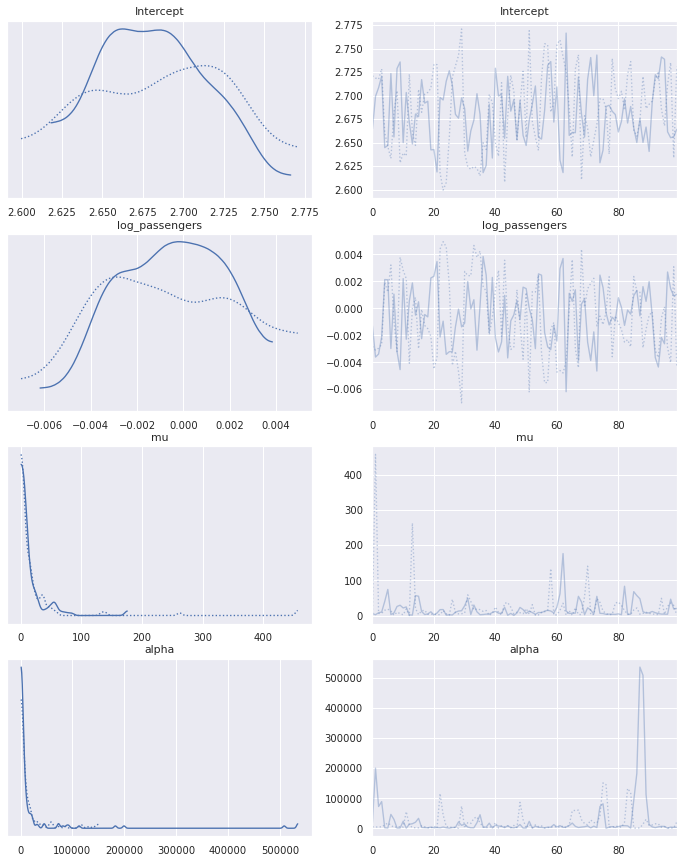

In [41]:
arviz.plot_trace(negbin_trace, figsize = (12,15))

In [42]:
new_best = best.loc[:, ['log_y', 'log_passengers']]
new_best = new_best.dropna()

In [43]:

negbin_model = sm.GLM(
    new_best.log_y, sm.add_constant(new_best['log_passengers']),
    family=sm.families.NegativeBinomial()
)
negbin_results = negbin_model.fit()
print(negbin_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  log_y   No. Observations:                  572
Model:                            GLM   Df Residuals:                      570
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2137.9
Date:                Tue, 13 Dec 2022   Deviance:                     0.050728
Time:                        06:58:03   Pearson chi2:                   0.0504
No. Iterations:                     3   Pseudo R-squ. (CS):          2.918e-06
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7115      0.167     16.

In [70]:
## bootstap uncertainty
def bootstrap_xy(df,n=100):
    """
    Uses bootstrap to generate multiple samples for estimates
    of the provided function.
    """
    const = []
    log_pass = []
    for _ in range(n):
        new = df.sample(n=df.shape[0],replace=True)
        negbin_model = sm.GLM(
        new.log_y, sm.add_constant(new['log_passengers']),
        family=sm.families.NegativeBinomial())
        negbin_results = negbin_model.fit()
        const.append(negbin_results.params[0])
        log_pass.append(negbin_results.params[1])
    return const,log_pass

boot_const = bootstrap_xy(new_best,1000)[0]
boot_logpass=bootstrap_xy(new_best,1000)[1]

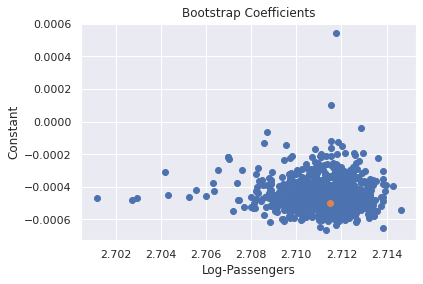

In [78]:
plt.scatter(boot_const,boot_logpass)
plt.scatter(2.7115, -0.0005)
plt.title('Bootstrap Coefficients')
plt.ylabel('Constant')
plt.xlabel('Log-Passengers')
#plt.savefig('bootstrap');

In [80]:
np.std(boot_const)

0.0014000294911377079

In [81]:
np.std(boot_logpass)

9.341779343525839e-05

To further investigate the uncertainty, we coded up a bootstrap function that uses random samples from our original dataframe to calculate the coefficients, and we get the standard deviations for both coefficients to be much lower than the standard error provided by the frequentist sm model.
constant sd: 0.0014
log-passengers sd:0.00012


In [ ]:
def negbin_model(x, y): 
    model = sm.GLM(
        y, x,
        family=sm.families.NegativeBinomial()
    )
    results = model.fit()
    params = results.params
    
    return params

In [ ]:
w_gaussian_boot = bootstrap_xy(sm.add_constant(ok_turbines.year), ok_turbines.log_totals, lin_model)
plt.xlabel('Intercept')
plt.ylabel('Coefficient for year')
plt.title('Standard linear regression (with log-count)')